## Read DAVIS .im7 files from ReadIM package 

In [1]:
!pip install ReadIM

### Read dependencies and install them

In [1]:
import os
import sys
import subprocess

repos = {
    "segment-anything": "https://github.com/facebookresearch/segment-anything.git",
    "GroundingDINO": "https://github.com/IDEA-Research/GroundingDINO.git",
    "supervision": "https://github.com/roboflow/supervision.git"
}

# If running in Google Colab, add the Flow_segmentation repository
try:
    import google.colab
    repos["Flow_segmentation"] = "https://github.com/AliRKhojasteh/Flow_segmentation.git"
except ImportError:
    pass

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
scripts_dir = os.path.join(parent_dir, 'Scripts', 'libs')

sys.path.append(os.path.dirname(scripts_dir))

os.makedirs(scripts_dir, exist_ok=True)

for repo_name, repo_url in repos.items():
    repo_path = os.path.join(scripts_dir, repo_name)

    if os.path.isdir(repo_path):
        print(f"Pulling the latest version of {repo_name}...")
        subprocess.run(['git', 'pull'], cwd=repo_path, check=True)
    else:
        print(f"Cloning the repository {repo_name}...")
        subprocess.run(['git', 'clone', repo_url, repo_path], check=True)

    sys.path.append(repo_path)

    # Install the dependencies
    requirements_path = os.path.join(repo_path, 'requirements.txt')
    if os.path.isfile(requirements_path):
        print(f"Installing dependencies for {repo_name}...")
        subprocess.run(['pip', 'install', '-r', requirements_path], check=True)

Pulling the latest version of segment-anything...
Pulling the latest version of GroundingDINO...
Installing dependencies for GroundingDINO...
Pulling the latest version of supervision...


### Loading the Input im7 files

All examples available in the 'demo' directory are permitted for demonstration purposes only. For additional usage permissions, please contact the corresponding authors listed in the references.


Text input: Nozzle


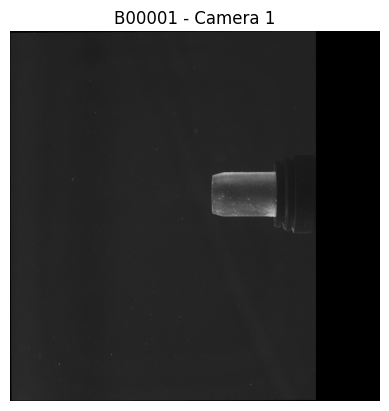

In [3]:
import os
import matplotlib.pyplot as plt
from im7_to_RGB import im7_to_RGB

###### Change the text prompt here ######
text_prompt = "Nozzle"
print("Text input:", text_prompt)
#########################################

parent_dir = os.path.dirname(os.getcwd())
im7_path = os.path.join(parent_dir, "Demo", "DAVIS_im7_example", "B00001.im7")

Cam_number = 1 # Camera pulse number, example : Camera 1 first pules is 0, second pulse is 1, etc.

image_pil = im7_to_RGB(im7_path, Cam_number, invert=False) #inver colors in the image if needed

plt.imshow(image_pil)
plt.title('B00001 - Camera 1')
plt.axis('off')
plt.show()      

### Compute masks

Device: cpu
final text_encoder_type: bert-base-uncased
Check the latest .pth from: https://github.com/IDEA-Research/GroundingDINO/releases


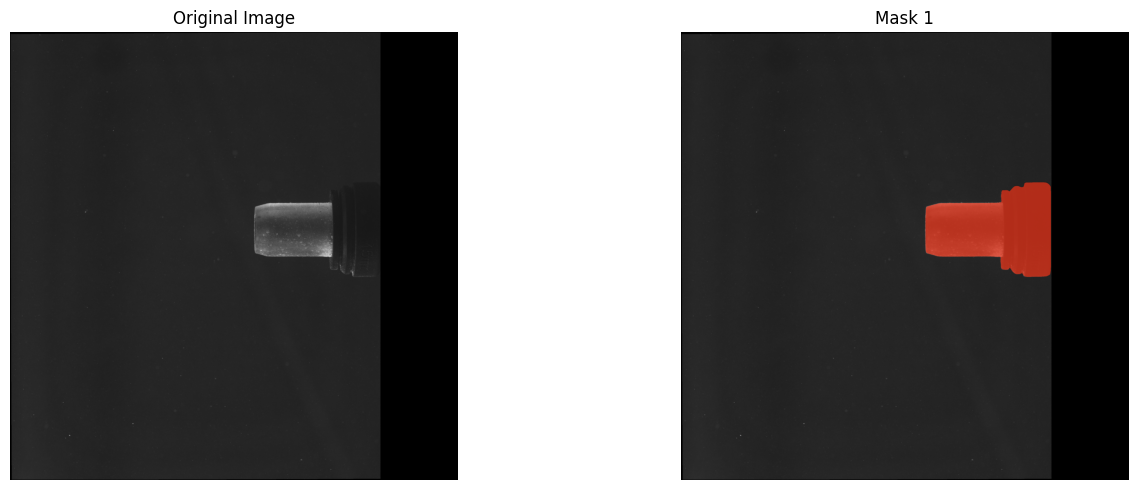

In [8]:
import torch
from Flow_segmentation import Superimpose_image_with_masks, Predictor, Groundingdino_model, Segmentation_model

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

groundingdino_model = Groundingdino_model()
# sam_model = Segmentation_model(sam_type="vit_b", ckpt_path=None, device='cpu')
sam_model = Segmentation_model(sam_type="vit_h", ckpt_path=None, device=device)

masks, boxes, phrases, logits = Predictor(image_pil, text_prompt, groundingdino_model, sam_model, box_threshold=0.3, text_threshold=0.25)

# image_pil = ImageOps.invert(image_pil) # if necessary

if len(masks) == 0:
    print(f"No objects of the '{text_prompt}' prompt detected in the image.")
else:
    # Convert masks to numpy arrays
    masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

    Superimpose_image_with_masks(image_pil, masks_np)


### Write masks back to .im7 (to be completed)